In [ ]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
input_data = "drive/MyDrive/brain_tumor_dataset/"

In [ ]:
input_data

'drive/MyDrive/brain_tumor_dataset/'

In [ ]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_data, output="output",
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False)

Copying files: 253 files [00:56,  4.47 files/s] 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data = "output/train/"
test_data = "output/val/"

In [ ]:
train_data

'output/train/'

In [ ]:
test_data

'output/val/'

In [ ]:
from torchvision import datasets, transforms

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_imgs = datasets.ImageFolder(
    root = train_data,
    transform = data_transform,
    target_transform = None
)

test_imgs = datasets.ImageFolder(
    root = test_data,
    transform = data_transform,
    target_transform = None
)

print(f"Train Data: \n{train_imgs}\n Test Data: \n{test_imgs}")

Train Data: 
Dataset ImageFolder
    Number of datapoints: 202
    Root location: output/train/
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
 Test Data: 
Dataset ImageFolder
    Number of datapoints: 51
    Root location: output/val/
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [ ]:
class_names = train_imgs.classes

In [ ]:
class_names

['no', 'yes']

In [ ]:
class_dict = train_imgs.class_to_idx

In [ ]:
class_dict

{'no': 0, 'yes': 1}

In [ ]:
len(train_imgs)

202

In [ ]:
len(test_imgs)

51

In [ ]:
img, label = train_imgs[7][0], train_imgs[0][1]

print(f"Image Tensor: {img}")
print(f"Image Shape: {img.shape}")
print(f"Image Datatype: {img.dtype}")
print(f"Image Label: {label}")
print(f"Label Datatype: {type(label)}")

Image Tensor: tensor([[[0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         ...,
         [0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078]],

        [[0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         ...,
         [0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078]],

        [[0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0078,  ..., 0.00

Original Image Shape: torch.Size([3, 64, 64]) -> [color, height, width]
Permuted Image shape: torch.Size([64, 64, 3]) -> [height, width, color]


(-0.5, 63.5, 63.5, -0.5)

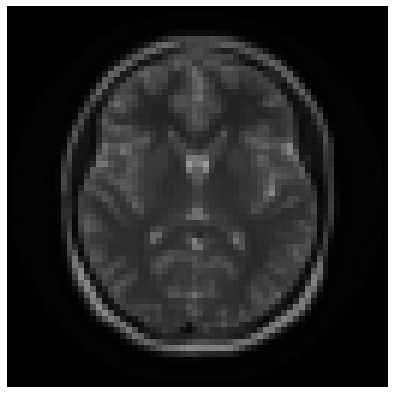

In [ ]:
img_permute = img.permute(1,2,0)

print(f"Original Image Shape: {img.shape} -> [color, height, width]")
print(f"Permuted Image shape: {img_permute.shape} -> [height, width, color]")

plt.figure(figsize=(10,7))
plt.imshow(img.permute(1,2,0))
plt.axis("off")

In [ ]:
class BrainTumorMRIV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(32, 32, 3, 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )

    self.block_2 = nn.Sequential(
        nn.Conv2d(32, 32, 3, 1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(32, 32, 3, 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = 2560, out_features = len(class_names))
    )

  def forward(self, x: torch.Tensor):
    x = self.block_1(x),
    x = self.block_2(x),
    x = self.classifier(x)


model_v1 = BrainTumorMRIV1()

In [ ]:
img.shape

torch.Size([3, 64, 64])

In [ ]:
len(class_names)

2

In [ ]:
model_v1

BrainTumorMRIV1(
  (block_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=2, bias=True)
  )
)

In [ ]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(params = model_v1.parameters(), lr = 0.1)

In [ ]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_dataloader = DataLoader(
    dataset = train_imgs,
    batch_size = 1,
    num_workers = 1,
    shuffle = True
)

test_dataloader = DataLoader(
    dataset = test_imgs,
    batch_size = 1,
    num_workers = 1,
    shuffle = False
)

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn):
  
  train_loss, train_acc = 0, 0

  for batch, (X.values(), y.values()) in enumerate(dataloader):

    y_pred = model_v1(X.values())

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(train_dataloader)
  test_loss /= len(test_dataloader)

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
  
  test_loss, test_acc = 0, 0

  model_v1.eval()
  with torch.zero_grad():
    for X, y in dataloader:
      test_pred = model_v1(X.values())

      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim=1))

      print(f"Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.5f}")

SyntaxError: ignored

In [ ]:
train_data

'output/train/'

In [ ]:
from timeit import default_timer

def print_train_time(start: float, end: float):
    total_time = end - start
    
    print(f"Total Time: {total_time:.3f} seconds")
    return total_time

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [ ]:
from tqdm.auto import tqdm
from timeit import default_timer as timer
train_time_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):

  print(f"Epoch: {epoch}\n---------------------")

  train_step(
      model = model_v1,
      dataloader = train_dataloader,
      loss_fn = loss_fn,
      optimizer = optimizer,
      accuracy_fn = accuracy_fn
  )

  test_step(
      model = model_v1,
      dataloader = test_dataloader,
      loss_fn = loss_fn,
      accuracy_fn = accuracy_fn
  )

train_time_end = timer()

total_train_time_model_v1 = print_train_time(start = train_time_start, end = train_time_end)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------------------


TypeError: ignored

In [ ]:
train_imgs[7][0]

tensor([[[0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         ...,
         [0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078]],

        [[0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         ...,
         [0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078]],

        [[0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.

In [ ]:
summary(model_v1)

NameError: ignored

In [ ]:
X

NameError: ignored

In [ ]:
train_dataloader

In [ ]:
for batch, (X, y) in enumerate(train_dataloader):
  print(f"X:{X} \n")
  print(f"y:{y}")

Streaming output truncated to the last 5000 lines.
X:tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000